# APS1070
#### Project 1 --- Basic Principles and Models 
**Deadline: Oct 6th, 9PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Yao Yao  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: 1004900388

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



In [ ]:
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb

# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset?  30
* How many observations have a 'mean area' of greater than 700? 171
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [3]:
import pandas as pd
import numpy as np

feature_data=dataset.data

# number of features in this dataset
feature_data.shape[1]

30

In [4]:
# number of observations that 'mean_area' > 700
count = 0 
for i in feature_data[:,dataset.feature_names.tolist().index("mean area")]:
  if i > 700:
    count = count + 1
print(count)

171


In [5]:
target_data = dataset.target
target_names = dataset.target_names
# number of participants tested in Malignant
malignant_samples= len([t for t in target_data if t == target_names.tolist().index('malignant')])
# number of participants tested in Benign
benign_samples= len([t for t in target_data if t == target_names.tolist().index('benign')])
print(malignant_samples)
print(benign_samples)

212
357


In [6]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [7]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
# train dataset: 70%; test dataset: 30%
X_train,X_test, y_train, y_test= train_test_split(feature_data, target_data, test_size=0.3, random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**




In [8]:
### YOUR CODE HERE ###
df_training = pd.DataFrame(data = X_train, columns= dataset.feature_names)
df_training['class'] = y_train
df_training['class'] = df_training['class'].replace([0,1],['malignant','benign'])
df_training

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,21.90,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941,0.09180,benign
1,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,24.54,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842,benign
2,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132,benign
3,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938,malignant
4,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,...,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737,malignant
394,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,malignant
395,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136,benign
396,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559,benign


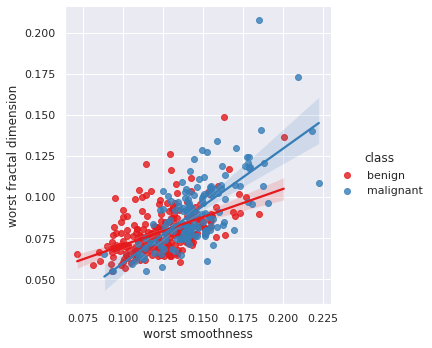

In [9]:
#plot without normalization
import seaborn as sns;sns.set_theme(color_codes=True)
g = sns.lmplot(x="worst smoothness", y="worst fractal dimension", hue="class", data=df_training, palette="Set1")

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# normalization
scaler.fit(X_train)
X_norm = scaler.transform(X_train)

# make the normalized training set a dataframe
df_training_nor = pd.DataFrame(data = X_norm, columns= dataset.feature_names)
df_training_nor['class'] = y_train
df_training_nor['class'] = df_training_nor['class'].replace([0,1],['malignant','benign'])
df_training_nor

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,-0.749980,-1.099787,-0.741586,-0.701887,0.584593,-0.427726,-0.457550,-0.760550,-0.099860,0.451444,...,-0.591967,-0.746602,-0.714529,0.116328,-0.341255,-0.046272,-0.623597,0.077542,0.450628,benign
1,-1.028214,-0.139262,-1.029804,-0.894732,0.742882,-0.731843,-0.843301,-0.808805,-1.159759,0.489386,...,-0.161981,-1.074343,-0.868941,0.382001,-0.970737,-0.954894,-0.761238,-1.071453,-0.295414,benign
2,-0.538522,-0.299349,-0.568574,-0.550561,-0.714814,-0.731647,-0.639856,-0.668125,0.581758,-0.053477,...,-0.051227,-0.614110,-0.552748,-0.471637,-0.485919,-0.384602,-0.504704,0.349008,-0.133716,benign
3,1.147577,-0.146430,1.061698,1.035628,-0.762301,-0.380637,-0.091016,0.221141,-0.663712,-1.225303,...,0.134448,0.914190,0.863760,-0.397597,-0.057793,0.441794,0.638339,0.495789,-0.799466,malignant
4,-2.004538,-1.376954,-1.962370,-1.415904,1.476766,-0.557221,-1.137578,-1.263267,0.439011,2.266825,...,-0.976348,-1.665615,-1.187480,1.126757,-0.867778,-1.391304,-1.756275,0.063338,0.563260,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1.286694,0.188082,1.154672,1.202251,-0.521270,-0.887630,-0.110105,0.228545,-0.917089,-1.851347,...,-0.201071,0.617827,0.572352,-0.358400,-0.895147,-0.246265,0.216119,-0.512738,-1.469120,malignant
394,-0.480093,1.158165,-0.338161,-0.507950,1.591885,2.658965,1.774450,0.917898,0.795879,2.887031,...,2.466795,-0.293051,-0.306224,2.298333,5.243276,4.333890,1.612342,2.326606,6.901830,malignant
395,-1.321473,-0.208553,-1.314385,-1.046877,0.318380,-0.873503,-0.790390,-0.904293,-1.074111,1.013278,...,-0.083802,-0.928196,-0.761422,0.033577,-0.967479,-0.798578,-0.986219,-0.691085,-0.131485,benign
396,-1.242455,-0.232447,-1.277599,-1.020928,-1.940832,-1.582194,-1.137578,-1.263267,-0.549515,0.266111,...,-0.766242,-1.321603,-0.988854,-2.672370,-1.473214,-1.391304,-1.756275,-1.551253,-1.010789,benign


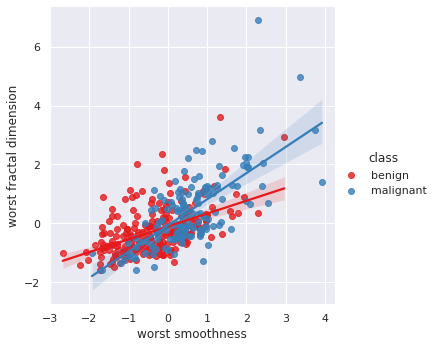

In [11]:
#plot the normalized training set with features 'worst smoothness' and 'worst fractal dimension'
import seaborn as sns;sns.set_theme(color_codes=True)
g = sns.lmplot(x="worst smoothness", y="worst fractal dimension", hue="class", data=df_training_nor, palette="Set1")

The scale of these two features is different. Before normalization, the scale is 0.05 to 0.2 and 0.075 to 0.225 for worst fractal dimension and worst smoothness,respectively. After normalization, the scale changed to -2 to 6 and -3 to 4 for worst fractal dimension and worst smoothness, respectively. Besides, the mean of data in each features after normalization is 0, which indicates consistency.

Since normalization won't change the original information of the data such as the distribution, the overall shape won't change too much. Hence they look similar.

The advantage of normalization is eliminating redundant data, imporving the overall organization and making the data consistent.


## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




In [12]:
### YOUR CODE HERE ###
from sklearn import neighbors
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

mean_cv_accuracy = []
mean_val_accuracy = []
k = []


for i in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  scores = cross_validate(knn, X_train,y_train, cv=5,return_train_score=True)
  mean_cv_accuracy.append(scores['train_score'].mean())
  mean_val_accuracy.append(scores['test_score'].mean())

  k.append(i)

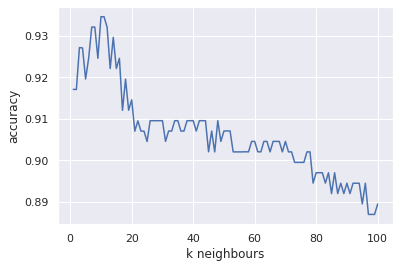

In [13]:
# mean cross-validation accuracy curve
plt.plot(k, mean_val_accuracy)
plt.xlabel("k neighbours")
plt.ylabel("accuracy")
plt.show()

In [14]:
# find the best k and its accuracy
k_accuarcy_dic = {}
for i in range(100):
  k_accuarcy_dic[str(k[i])] = mean_val_accuracy[i]
max_k = max(k_accuarcy_dic, key = k_accuarcy_dic.get)
print(max_k, k_accuarcy_dic[max_k])

10 0.9346518987341772


Q2. The best k is 10 and its mean cross-validation accuracy is 93.47%.




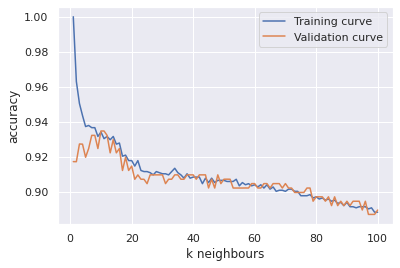

In [ ]:
plt.plot(k, mean_cv_accuracy, label="Training curve ")
plt.plot(k, mean_val_accuracy, label="Validation curve")
plt.legend(loc="best")
plt.xlabel("k neighbours")
plt.ylabel("accuracy")
plt.show()

Q3. Compared to training and validation curves, we could observe that the accuracy of training curve is higher than validation curve accuracy before k = 37. Hence we may conclude that the model is overfitting in the range of (1,37).

Also, we could observe that after k = 37, the accuracy of training and validation is not that high, besides we could oberserve that the validation curve is sometimes higher than training curve. Therefore, we may conclude that the model is underfitting in the range (38,100) of k.

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the on the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
from pandas.core.ops.mask_ops import kleene_and
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

def best_k_cv(X_train, y_train):
  # store k and mean cross-validation score of the adjust dataframe(k:1-100)
  mean_val_accuracy1 = []
  k1 = []

  for i in range(1,101):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    scores = cross_validate(knn, X_train,y_train, cv=5,return_train_score=True)
    mean_val_accuracy1.append(scores['test_score'].mean())

    k1.append(i)

  # find and store the best k and cross-validation score in the list
  k_accuarcy_dic = {}
  for i in range(100):
    k_accuarcy_dic[str(k1[i])] = mean_val_accuracy1[i]
  max_k = max(k_accuarcy_dic, key = k_accuarcy_dic.get)

  best_k = []
  best_mean_cv_score = []
  best_k.append(max_k)
  best_mean_cv_score.append(k_accuarcy_dic[max_k])

  # return 2 lists
  return best_k, best_mean_cv_score


def step_3(X_train , y_train, removed_features):
  feature_importance = {}
  model = DecisionTreeClassifier(max_depth=15)
  # Fit the model to our training data
  model.fit(X_train, y_train)

  # extract the importance order
  importance = model.feature_importances_

  # put corresponding features and feature importance into a dictionary
  for i in range(len(importance)):
    feature_importance[(list(X_train.columns))[i]] = importance[i]
  
  #remove the least important features from dataset
  min_feature = min(feature_importance, key = feature_importance.get)
  X_train.drop(columns=[min_feature], inplace = True)
  
  removed_features.append(min_feature)

  return X_train, y_train, removed_features


def Feature_selector(X_train , y_train , tr=0.95):
  best_k = []
  best_cv = []
  #full feature best k and best cross-validation accuracy
  full_feature_k, full_feature_cv = best_k_cv(X_train, y_train)

  #step3
  new_X_train, new_y_train, first_removed_features = step_3(X_train, y_train,[])

  #tuned dataframe best k and best cross-validation accuracy
  tune_feature_k, tune_feature_cv = best_k_cv(new_X_train, new_y_train)
  best_k.append(tune_feature_k[0])
  best_cv.append(tune_feature_cv[0])

  while new_X_train.shape[1] != 1 and tune_feature_cv[0] >= full_feature_cv[0] * tr:
    new_X_train, new_y_train, first_removed_features = step_3(new_X_train, new_y_train, first_removed_features)
    tune_feature_k, tune_feature_cv = best_k_cv(new_X_train, new_y_train)
    best_k.append(tune_feature_k[0])
    best_cv.append(tune_feature_cv[0])

  return first_removed_features,best_cv,best_k

In [ ]:
X_train,X_test, y_train, y_test= train_test_split(feature_data, target_data, test_size=0.3, random_state=0)
X_train = pd.DataFrame(data = X_train, columns= dataset.feature_names)

removed_features, best_cv, best_k = Feature_selector(X_train , y_train , tr=0.95)


In [ ]:
removed_features

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean fractal dimension',
 'texture error',
 'perimeter error',
 'compactness error',
 'smoothness error',
 'concavity error',
 'symmetry error',
 'concave points error',
 'worst area',
 'worst smoothness',
 'worst perimeter',
 'worst compactness',
 'fractal dimension error',
 'worst fractal dimension',
 'radius error',
 'mean symmetry',
 'worst texture',
 'worst concavity',
 'worst symmetry',
 'area error',
 'worst radius']

In [ ]:
best_cv

[0.9346518987341772,
 0.9346518987341772,
 0.9321518987341773,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9145886075949367,
 0.9296835443037974,
 0.9296835443037974,
 0.904493670886076,
 0.9020569620253165,
 0.9020569620253165,
 0.9020569620253165,
 0.9020569620253165,
 0.9020569620253165,
 0.9094620253164557,
 0.8993670886075948,
 0.8993670886075948,
 0.9120569620253164,
 0.9246202531645569]

In [ ]:
list(map(int, best_k))

[10,
 10,
 7,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 34,
 20,
 20,
 1,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 38,
 34]

Text(0, 0.5, 'accuracy')

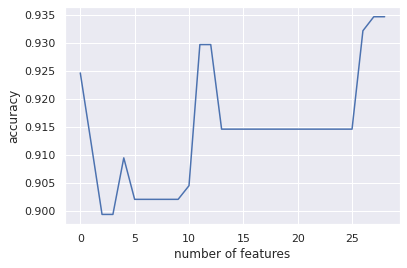

In [ ]:
plt.plot(best_cv[::-1])
plt.xlabel("number of features")
plt.ylabel("accuracy")

Text(0, 0.5, 'k neighbours')

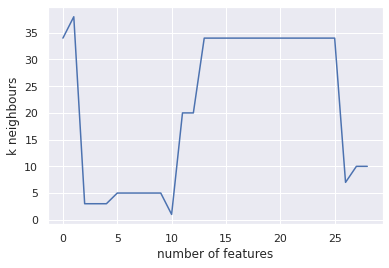

In [ ]:
plt.plot(list(map(int, best_k))[::-1])
plt.xlabel("number of features")
plt.ylabel("k neighbours")

Text(0, 0.5, 'accuracy')

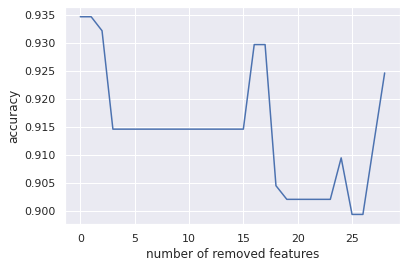

In [ ]:
plt.plot(best_cv)
plt.xlabel("number of removed features")
plt.ylabel("accuracy")

The essential number of feature is 27, since the accuracy of cross-validation have a dramtic decrease at the third number of features, which means the essential number of feature is 27 for classification.

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler.fit(X_test)
X_test_norm = scaler.transform(X_test)

In [ ]:
X_norm = pd.DataFrame(data = X_norm, columns= dataset.feature_names)

removed_features_nor, best_cv_nor, best_k_nor = Feature_selector(X_norm , y_train , tr=0.95)

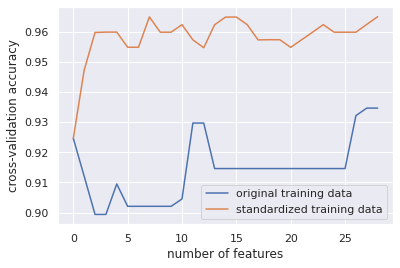

In [ ]:
plt.plot(best_cv[::-1], label="original training data")
plt.plot(best_cv_nor[::-1], label="standardized training data")
plt.legend(loc="best")
plt.xlabel("number of features")
plt.ylabel("cross-validation accuracy")
plt.show()

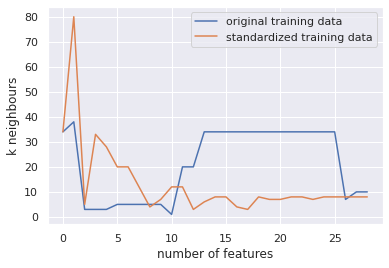

In [ ]:
plt.plot(list(map(int, best_k))[::-1], label="original training data")
plt.plot(list(map(int, best_k_nor))[::-1], label="standardized training data")
plt.legend(loc="best")
plt.xlabel("number of features")
plt.ylabel("k neighbours")
plt.show()


The mean of data in each features after normalization is 0 and the standard deviation is 1, which indicates consistency. Furthermore, normalization is elminating redundant data, improving the overall organization and making the data consistent. 

Therefore, the standardized training data has a higher cross validation accuracy about all number of features. 

From the k-neighbours vs number of features plot, we could observe that when 'mean radius','mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean fractal dimension', 'texture error' and 'perimeter error' in total 11 features were removed, the standardized training data has a greater k than original data(i.e from 6 to 81). 


## Part 5: Decision Tree Classifier [1.5 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


In [ ]:
### YOUR CODE HERE ###
from pandas.core.ops.mask_ops import kleene_and
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dt_mean_cv_score = []
for i in range(1,20):
  for k in range(2,20):
    model = DecisionTreeClassifier(max_depth = i, min_samples_split = k)
    scores_dt = cross_validate(model, X_norm,y_train, cv=5,return_train_score=True)
    dt_mean_cv_score.append(scores_dt['test_score'].mean())
max(dt_mean_cv_score)
  

0.916993670886076

In [ ]:
mean_val_accuracy2 = []
k2 = []


for i in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  scores = cross_validate(knn, X_norm,y_train, cv=5,return_train_score=True)
  mean_val_accuracy2.append(scores['test_score'].mean())

  k2.append(i)

# find the best k and its accuracy
k_accuarcy_dic2 = {}
for i in range(100):
  k_accuarcy_dic2[str(k2[i])] = mean_val_accuracy2[i]
max_k2 = max(k_accuarcy_dic2, key = k_accuarcy_dic2.get)

print(max_k2, k_accuarcy_dic2[max_k2])


10 0.9674367088607594


The decision tree's performance(mean CV score) on standardized data is 91.6994% accuracy and with knn is 96.7437% accuracy. Compared these two data, the decision tree with knn has a higher accuracy.




## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [18]:
### YOUR CODE HERE ###

knn = neighbors.KNeighborsClassifier(n_neighbors=10)

# Fit the model to our training data
knn.fit(X_norm, y_train)

# Make predictions
test_predicted = knn.predict(X_test_norm)
score = 100*(1-sum(abs(test_predicted-y_test))/len(test_predicted))
print("KNN accuracy:", score)

KNN accuracy: 95.90643274853801


In [19]:
# obtain survival predictions on all training data
train_predicted = knn.predict(X_norm)

# obtain a percentage score of performance on all training data
score = 100*(1-sum(abs(train_predicted-y_train))/len(train_predicted))
print('Training data performance', score, '% correctly predicted')

Training data performance 96.73366834170855 % correctly predicted


Upon all the trained models, we found the knn model with k = 10 on standardized data has the highest CV accuracy. Hence we use that model to test our dataset.

After fitting the model, the KNN accuracy of test model is 95.9064% correctly predicted and the accuracy of training model is 96.7337% correctly predicted. 

The prediction achieved better performance on the training data than the training data since we keep training our model on training dataset. But the accuracy for the testing data also good. Therefore, we may apply that model to other dataset for prediction.

(although the instruction mentioned we need to use the initially set aside data to make prediction, since our model with the highest accuracy is knn on standardized model, in this case I will choose the standardized testing data to test our acccuracy.)

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/